Data from Rent the Runway - on size and fit

Potential question topics:
1. what is the typical customer like (age, size, etc.); how many items are customers renting
2. what are the most common categories of items rented and what are they most often rented four
3. do items that fit (rather than being small or large) receive higher ratings than those that are small or large
4. do items that have higher ratings get rented more often

charts below are a begininning exploration of data to get ideas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_json('renttherunway_final_data.json', lines = True)
df

,age,body type,bust size,category,fit,height,item_id,rating,rented for,review_date,review_summary,review_text,size,user_id,weight
0,28.0,hourglass,34d,romper,fit,"5' 8""",2260466,10.0,vacation,"April 20, 2016",So many compliments!,An adorable romper! Belt and zipper were a lit...,14,420272,137lbs
1,36.0,straight & narrow,34b,gown,fit,"5' 6""",153475,10.0,other,"June 18, 2013",I felt so glamourous!!!,I rented this dress for a photo shoot. The the...,12,273551,132lbs
2,116.0,NaN,NaN,sheath,fit,"5' 4""",1063761,10.0,party,"December 14, 2015",It was a great time to celebrate the (almost) ...,This hugged in all the right places! It was a ...,4,360448,NaN
3,34.0,pear,34c,dress,fit,"5' 5""",126335,8.0,formal affair,"February 12, 2014",Dress arrived on time and in perfect condition.,I rented this for my company's black tie award...,8,909926,135lbs
4,27.0,athletic,34b,gown,fit,"5' 9""",616682,10.0,wedding,"September 26, 2016",Was in love with this dress !!!,I have always been petite in my upper body and...,12,151944,145lbs
5,45.0,athletic,32b,dress,fit,"5' 8""",364092,8.0,date,"April 30, 2016",Traditional with a touch a sass,Didn't actually wear it. It fit perfectly. The...,8,734848,138lbs
6,27.0,hourglass,34c,dress,fit,"5' 3""",568429,10.0,everyday,"December 7, 2017",LITERALLY THE CUTEST DRESS EVER,This dress is so sweet. I loved the print. The...,4,336066,112lbs
7,65.0,full bust,34d+,dress,fit,"5' 3""",130259,10.0,formal affair,"January 1, 2013","Great dress, beautifully made. I received lot...",Fit was great. Maybe a little tight under the ...,8,86661,118lbs
8,27.0,full bust,36d,gown,fit,"5' 6""",1729232,10.0,formal affair,"June 27, 2016",Great for black tie event!,I was nervous of it looking cheap when it arri...,21,166228,NaN
9,33.0,petite,32b,gown,fit,"5' 3""",1729232,10.0,formal affair,"October 17, 2016",This dress was everything! It was perfect for ...,The dress was very flattering and fit perfectl...,1,154309,114lbs


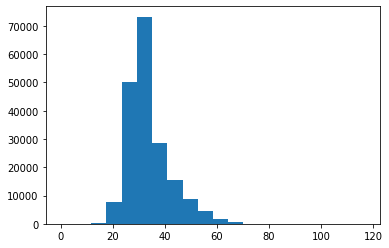

In [16]:
#histogram of customers by age
plt.hist(df['age'], bins=20)
plt.show()

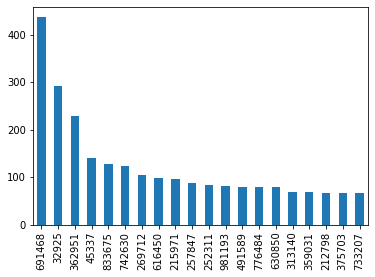

In [5]:
#top 20 users
df.user_id.value_counts().head(20).plot(kind='bar')

In [64]:
#top user
df[df['user_id']== 691468]

,age,body type,bust size,category,fit,height,item_id,rating,rented for,review_date,review_summary,review_text,size,user_id,weight
762,31.0,full bust,34c,blazer,large,"5' 3""",2660685,10.0,party,"November 2, 2015",great tux cape!,worn for a masquerade dinner and it was perfec...,8,691468,125lbs
1025,31.0,full bust,34c,dress,large,"5' 3""",331370,10.0,work,"January 12, 2017",awesome casual/work dress!,i'm typically a 2/4 but equipment runs large s...,4,691468,125lbs
1225,31.0,full bust,34c,dress,fit,"5' 3""",797218,10.0,work,"April 27, 2016",love this!,the colors are awesome. the material is a touc...,8,691468,125lbs
1401,31.0,full bust,34c,dress,large,"5' 3""",326908,10.0,everyday,"July 20, 2016",cute lace dress!,"i'm typically btwn 2 and 4, usually 2 in erin....",4,691468,125lbs
1769,31.0,full bust,34c,dress,large,"5' 3""",609338,8.0,everyday,"August 4, 2016","massive, but cld be cute","i'm typically btwn a 2 and 4, usually a 4 in b...",8,691468,125lbs
2316,31.0,full bust,34c,blouse,fit,"5' 3""",2280839,8.0,work,"June 16, 2017","cute, but worn",i'm into the shape of the top. it is tight aro...,8,691468,125lbs
2494,31.0,full bust,34c,gown,large,"5' 3""",1754771,6.0,formal affair,"May 18, 2015","beautiful color, but runs large",i didn't end up wearing this dress because it ...,8,691468,125lbs
2773,31.0,full bust,34c,dress,fit,"5' 3""",1382749,10.0,work,"November 1, 2017",RENT THIS!!!,i love this dress. it's perfect for fall. i am...,12,691468,125lbs
2870,31.0,full bust,34c,dress,fit,"5' 3""",1819243,10.0,work,"October 13, 2016",great twist to the avg work dress!,"top is a sweatshirt like material, bottom is d...",8,691468,125lbs
3589,31.0,full bust,34c,sheath,fit,"5' 3""",1171513,8.0,party,"January 22, 2016",nice dress!,the white part of the dress isn't nearly as wh...,8,691468,125lbs


In [67]:
#number of reviews by the RTR team
df[df['review_summary']== 'RTR Team Review']

,age,body type,bust size,category,fit,height,item_id,rating,rented for,review_date,review_summary,review_text,size,user_id,weight
368,30.0,athletic,32d,gown,fit,"5' 4""",945246,8.0,party,"August 11, 2017",RTR Team Review,Didn't like the way the fabric clung to my hip...,8,675604,150lbs
612,28.0,straight & narrow,34c,dress,small,"5' 9""",1453647,8.0,party,"May 1, 2017",RTR Team Review,"Loved the idea of this dress, but overall not ...",8,141416,135lbs
1754,22.0,straight & narrow,34c,dress,fit,"5' 5""",591853,10.0,other,"June 28, 2016",RTR Team Review,This is my all-time favorite dress! The sleek ...,4,257847,120lbs
1833,21.0,straight & narrow,32b,dress,fit,"5' 7""",1073611,8.0,formal affair,"March 10, 2017",RTR Team Review,On trend yet classic this black Marchesa is a ...,1,726839,118lbs
2022,26.0,pear,34b,top,large,"5' 7""",2510283,10.0,everyday,"June 29, 2016",RTR Team Review,Absolutely LOVE this top. The fabric is light ...,8,45337,130lbs
2163,22.0,straight & narrow,34c,dress,fit,"5' 5""",666332,10.0,other,"July 7, 2016",RTR Team Review,"With such a unique neckline and print, this Tr...",4,257847,120lbs
2921,25.0,athletic,34c,dress,small,"5' 6""",1775530,10.0,everyday,"January 7, 2017",RTR Team Review,What a feminine number by Nicholas! This is su...,8,472391,130lbs
3447,29.0,athletic,36b,tunic,large,"5' 6""",2609834,8.0,everyday,"March 2, 2017",RTR Team Review,Great top for work or play! Running a bit larg...,8,796026,138lbs
3773,21.0,NaN,34b,dress,fit,"5' 6""",710897,10.0,other,"July 19, 2017",RTR Team Review,"Very cool dress! I loved the detail, the patte...",12,212798,126lbs
4414,22.0,straight & narrow,34c,dress,fit,"5' 5""",711795,10.0,other,"November 11, 2016",RTR Team Review,This dress will go down as one of my absolute ...,8,257847,120lbs


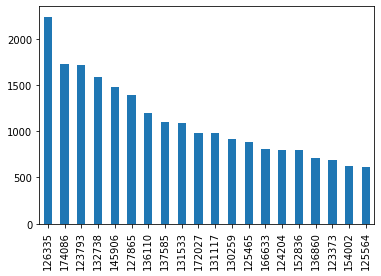

In [6]:
#most popular items
df.item_id.value_counts().head(20).plot(kind='bar')

In [44]:
#count of items rented by category
categories = df.groupby('category').count()
print('Number of Categories: ',len(categories))
categories2 = categories.loc[:, 'item_id']
print(categories2)

Number of Categories:  68
category
ballgown           16
blazer            782
blouse            651
blouson            14
bomber            128
buttondown          1
caftan              4
cami               16
cape               84
cardigan          241
coat              980
combo               8
crewneck            1
culotte            75
culottes          188
down              464
dress           92884
duster             12
for                 7
frock             205
gown            44381
henley              8
hoodie             14
jacket           2404
jeans               5
jogger              6
jumpsuit         5184
kaftan             17
kimono             30
knit               48
                ...  
pants             422
parka              17
peacoat            39
poncho             48
print             103
pullover           58
romper           3070
sheath          19316
shift            5365
shirt             277
shirtdress        729
skirt            1531
skirts             

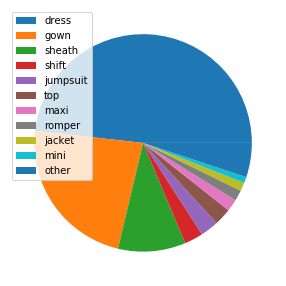

In [63]:
#items rented by category
category_counts = pd.DataFrame(categories2)
category_counts = category_counts.sort_values('item_id', ascending = False)
other = int(category_counts[10:].sum())
category_counts = category_counts[:10]
category_counts.loc[11] = other
category_counts = category_counts.rename(index={11: 'other'})

plt.figure(figsize=(10, 5))
plt.pie(category_counts.item_id)
plt.legend(category_counts.index)